<a href="https://colab.research.google.com/github/Archanatshinod/Data_science_and_Machine_Learning/blob/main/Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import all necessary modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

In [ ]:
#load CSV File
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Heart_Disease_Prediction.csv')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


# **Exploratory Data Analysis**


In [ ]:
#Check null value
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
# Chech size and Shape
df.shape

(270, 14)

In [ ]:
df.size

3780

In [ ]:
#columns Name
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
#Print first and last 5 Rows using tail()and head()
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


**Perform the value count operation to count the number of occurrences of each unique value in a DataFrame column.**

In [ ]:
#Value Count of outcome
df.value_counts(df['Heart Disease'])

Heart Disease
Absence     150
Presence    120
dtype: int64

<Axes: xlabel='Heart Disease', ylabel='count'>

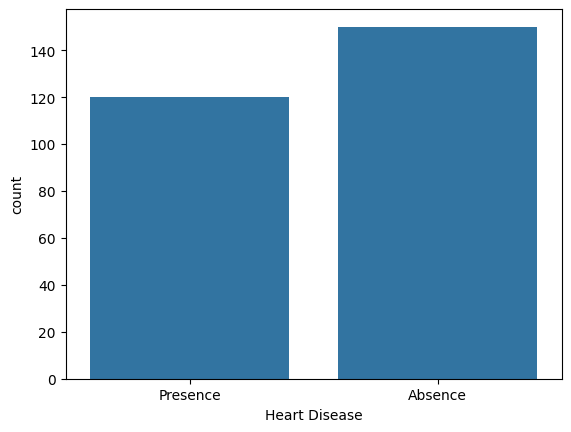

In [ ]:
sns.countplot(x='Heart Disease',data=df)

##**Data Visualization**

<Axes: >

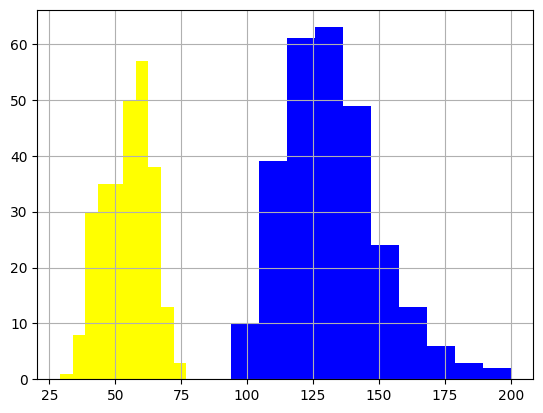

In [ ]:
df['Age'].hist(color='yellow')
df['BP'].hist(color='blue')

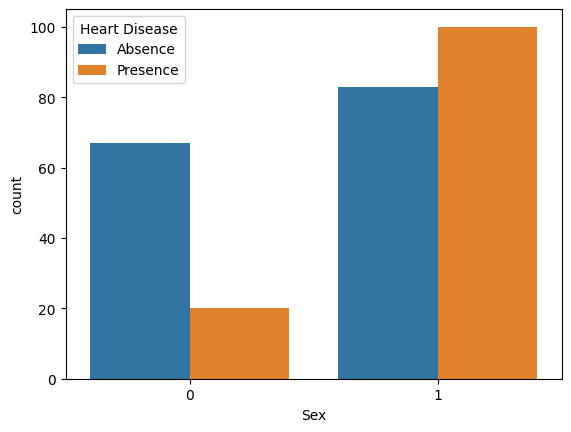

In [ ]:
sns.countplot(x="Sex", hue="Heart Disease", data=df)
plt.show()

#0 female
#1 Male

<ipython-input-24-e7486308d882>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-24-e7486308d882>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot= True)


<Axes: >

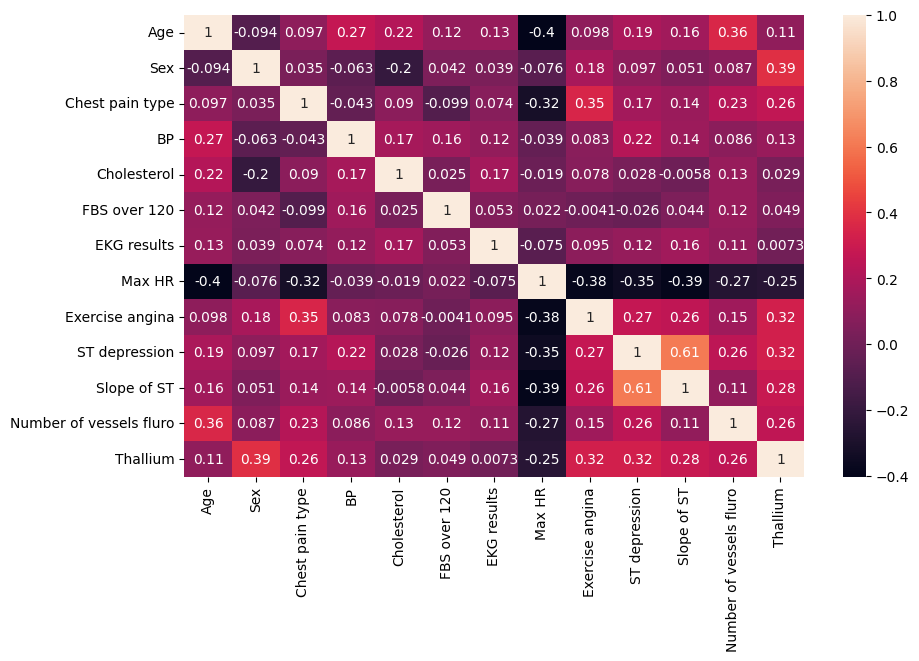

In [ ]:
df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),annot= True)

#**Label Encoding**

In [ ]:
#Label Encoding : convert categorical data into numerical format
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
outcome_enc=lbl.fit_transform(df['Heart Disease'])

In [ ]:
df['Heart Disease']=outcome_enc

In [ ]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


Now the target variable having values '0' and '1'

so we choose classification problem

**Correlation between variables**

In [ ]:
print(df.corr()["Heart Disease"].abs().sort_values(ascending=False))

Heart Disease              1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
Max HR                     0.418514
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120               0.016319
Name: Heart Disease, dtype: float64


"This indicates that most columns are moderately correlated with the target variable, but 'fbs' shows a very weak correlation."

#**Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
data_scaled= sc.fit_transform(df)



---



In [ ]:
data_scaled= pd.DataFrame(data_scaled)
data_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.854167,1.0,1.000000,0.339623,0.447489,0.0,1.0,0.290076,0.0,0.387097,0.5,1.000000,0.00,1.0
1,0.791667,0.0,0.666667,0.198113,1.000000,0.0,1.0,0.679389,0.0,0.258065,0.5,0.000000,1.00,0.0
2,0.583333,1.0,0.333333,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.048387,0.0,0.000000,1.00,1.0
3,0.729167,1.0,1.000000,0.320755,0.312785,0.0,0.0,0.259542,1.0,0.032258,0.5,0.333333,1.00,0.0
4,0.937500,0.0,0.333333,0.245283,0.326484,0.0,1.0,0.381679,1.0,0.032258,0.0,0.333333,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1.0,0.666667,0.735849,0.166667,1.0,0.0,0.694656,0.0,0.080645,0.0,0.000000,1.00,0.0
266,0.312500,1.0,0.333333,0.245283,0.312785,0.0,0.0,0.778626,0.0,0.000000,0.0,0.000000,1.00,0.0
267,0.562500,0.0,0.333333,0.433962,0.383562,0.0,1.0,0.625954,0.0,0.209677,0.5,0.000000,0.00,0.0
268,0.583333,1.0,1.000000,0.433962,0.150685,0.0,0.0,0.587786,0.0,0.064516,0.5,0.000000,0.75,0.0


# **Train and Test Splitting**

Extract input and Output from this DataFrame

In [ ]:
x = data_scaled.iloc[:,:-1]

In [ ]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.854167,1.0,1.000000,0.339623,0.447489,0.0,1.0,0.290076,0.0,0.387097,0.5,1.000000,0.00
1,0.791667,0.0,0.666667,0.198113,1.000000,0.0,1.0,0.679389,0.0,0.258065,0.5,0.000000,1.00
2,0.583333,1.0,0.333333,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.048387,0.0,0.000000,1.00
3,0.729167,1.0,1.000000,0.320755,0.312785,0.0,0.0,0.259542,1.0,0.032258,0.5,0.333333,1.00
4,0.937500,0.0,0.333333,0.245283,0.326484,0.0,1.0,0.381679,1.0,0.032258,0.0,0.333333,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1.0,0.666667,0.735849,0.166667,1.0,0.0,0.694656,0.0,0.080645,0.0,0.000000,1.00
266,0.312500,1.0,0.333333,0.245283,0.312785,0.0,0.0,0.778626,0.0,0.000000,0.0,0.000000,1.00
267,0.562500,0.0,0.333333,0.433962,0.383562,0.0,1.0,0.625954,0.0,0.209677,0.5,0.000000,0.00
268,0.583333,1.0,1.000000,0.433962,0.150685,0.0,0.0,0.587786,0.0,0.064516,0.5,0.000000,0.75


In [ ]:
y = data_scaled.iloc[:,-1].values
y

array([1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

### Split the data into a training set and a testing set.


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)



---



# **Apply Machine Learning algorithms(Classification)**

## **1.KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model1 = KNeighborsClassifier()
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#Predict the output using x_test
y_pred1= model1.predict(x_test)
y_pred1

array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.])

In [ ]:
#Find the accuracy score
acc1 = accuracy_score(y_test,y_pred1)
print("Accuracy of KNN Algorithm:", acc1)

Accuracy of KNN Algorithm: 0.7941176470588235


In [ ]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred1})

,Actual,Prediction
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
63,0.0,1.0
64,1.0,1.0
65,0.0,1.0
66,0.0,0.0


In [ ]:
#Confusion Matrix and classification report
cnn1=confusion_matrix(y_pred1,y_test)
cnn1

array([[32,  6],
       [ 8, 22]])

In [ ]:

clf1=classification_report(y_test,y_pred1)
print(clf1)

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82        40
         1.0       0.73      0.79      0.76        28

    accuracy                           0.79        68
   macro avg       0.79      0.79      0.79        68
weighted avg       0.80      0.79      0.80        68



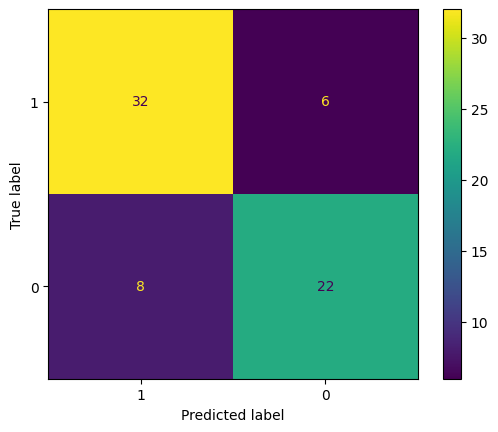

In [ ]:
#Confusion matrix display
out=[1,0]
cndis1=ConfusionMatrixDisplay(cnn1,display_labels=out)
cndis1.plot()

##**2.Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
model3=SVC()

In [ ]:
model3.fit(x_train,y_train)

SVC()

In [ ]:
y_pred3=model3.predict(x_test)

In [ ]:
y_pred3

array([1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.])

In [ ]:
#Compare y_test and predicted output by converting it into a dataframe
pd.DataFrame({'Actual':y_test,'Prediction':y_pred3})

,Actual,Prediction
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
63,0.0,1.0
64,1.0,1.0
65,0.0,0.0
66,0.0,0.0


In [ ]:
#Accuracy Score
acc3 = accuracy_score(y_test,y_pred3)
print("Accuracy of Support Vector Machine:", acc3)

Accuracy of Support Vector Machine: 0.8088235294117647


In [ ]:
#classification report
clf3=classification_report(y_test,y_pred3)
print(clf3)

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84        40
         1.0       0.76      0.79      0.77        28

    accuracy                           0.81        68
   macro avg       0.80      0.81      0.80        68
weighted avg       0.81      0.81      0.81        68



In [ ]:
#Confusion Matrix
cnn3=confusion_matrix(y_pred3,y_test)
cnn3

array([[33,  6],
       [ 7, 22]])

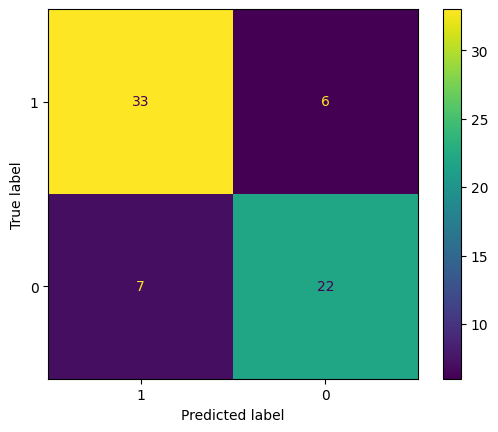

In [ ]:
#Confusion matrix display
out=[1,0]
cndis3=ConfusionMatrixDisplay(cnn3,display_labels=out)
cndis3.plot()

## **3.Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4=model4.predict(x_test)
y_pred4

array([0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.])

In [ ]:
#Compare y_test and predicted output by converting it into a dataframe
pd.DataFrame({'Actual':y_test,'Prediction':y_pred4})

,Actual,Prediction
0,1.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
63,0.0,1.0
64,1.0,1.0
65,0.0,0.0
66,0.0,0.0


In [ ]:
#Accuracy Score
acc4 = accuracy_score(y_test,y_pred4)
print("Accuracy of Decison Tree:", acc4)


Accuracy of Decison Tree: 0.7058823529411765


In [ ]:
#Confusion Matrix
cnn4=confusion_matrix(y_pred4,y_test)
cnn4


array([[27,  7],
       [13, 21]])

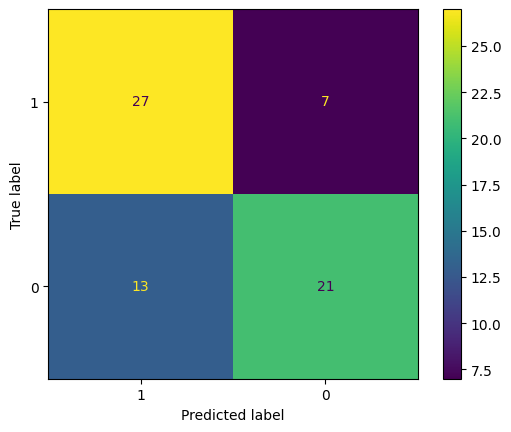

In [ ]:
#Confusion matrix display
out=[1,0]
cndis4=ConfusionMatrixDisplay(cnn4,display_labels=out)
cndis4.plot()

In [ ]:
#classification report
clf4=classification_report(y_test,y_pred4)
print(clf4)

              precision    recall  f1-score   support

         0.0       0.79      0.68      0.73        40
         1.0       0.62      0.75      0.68        28

    accuracy                           0.71        68
   macro avg       0.71      0.71      0.70        68
weighted avg       0.72      0.71      0.71        68



## **4.Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(n_estimators = 200)
model5.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred5=model5.predict(x_test)

In [ ]:
y_pred5

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.])

In [ ]:
#Compare y_test and predicted output by converting it into a dataframe
pd.DataFrame({'Actual':y_test,'Prediction':y_pred5})

,Actual,Prediction
0,1.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
63,0.0,1.0
64,1.0,1.0
65,0.0,0.0
66,0.0,0.0


In [ ]:
#Accuracy Score
acc5 = accuracy_score(y_test,y_pred5)
print("Accuracy of Random Forest:", acc5)



Accuracy of Random Forest: 0.8529411764705882


In [ ]:
#classification report
clf5=classification_report(y_test,y_pred5)
print(clf5)

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88        40
         1.0       0.91      0.71      0.80        28

    accuracy                           0.85        68
   macro avg       0.87      0.83      0.84        68
weighted avg       0.86      0.85      0.85        68



In [ ]:
#Confusion Matrix
cnn5=confusion_matrix(y_pred5,y_test)
cnn5


array([[38,  8],
       [ 2, 20]])

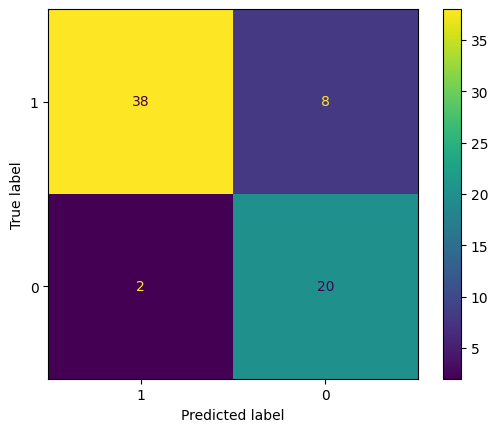

In [ ]:

#Confusion matrix display
out=[1,0]
cndis5=ConfusionMatrixDisplay(cnn5,display_labels=out)
cndis5.plot()


#**5.Logistic Regression**





In [ ]:
from sklearn.linear_model import LogisticRegression
model6= LogisticRegression()
model6.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred6=model6.predict(x_test)

In [ ]:
#Compare y_test and predicted output by converting it into a dataframe
pd.DataFrame({'Actual':y_test,'Prediction':y_pred6})

,Actual,Prediction
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
63,0.0,1.0
64,1.0,1.0
65,0.0,0.0
66,0.0,0.0


In [ ]:
#Accuracy Score
acc6 = accuracy_score(y_test,y_pred6)
print("Accuracy of Random Forest:", acc6)


Accuracy of Random Forest: 0.8970588235294118


In [ ]:
#classification report
clf6=classification_report(y_test,y_pred6)
print(clf6)

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92        40
         1.0       0.92      0.82      0.87        28

    accuracy                           0.90        68
   macro avg       0.90      0.89      0.89        68
weighted avg       0.90      0.90      0.90        68



In [ ]:
#Confusion Matrix
cnn6=confusion_matrix(y_pred6,y_test)
cnn6


array([[38,  5],
       [ 2, 23]])

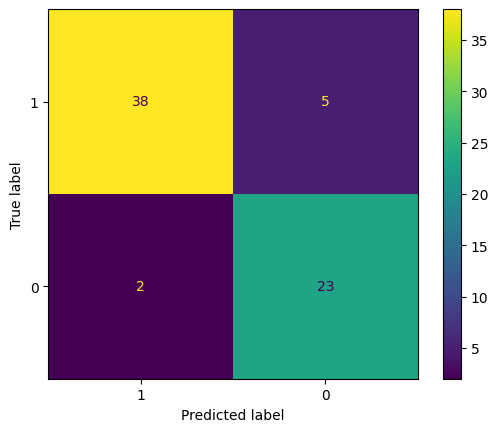

In [ ]:

#Confusion matrix display
out=[1,0]
cndis6=ConfusionMatrixDisplay(cnn6,display_labels=out)
cndis6.plot()


#***Compare all the given accuracy scores and select the  best algorithm for prediction***

In [ ]:
accuracy_df=pd.DataFrame({'Accuracy':[acc1,acc3,acc4,acc5,acc6],'Algorithm':['KNN','SVM','Decision Tree','Random Forest','Logistic Regression']})

In [ ]:
accuracy_df

,Accuracy,Algorithm
0,0.794118,KNN
1,0.808824,SVM
2,0.705882,Decision Tree
3,0.852941,Random Forest
4,0.897059,Logistic Regression


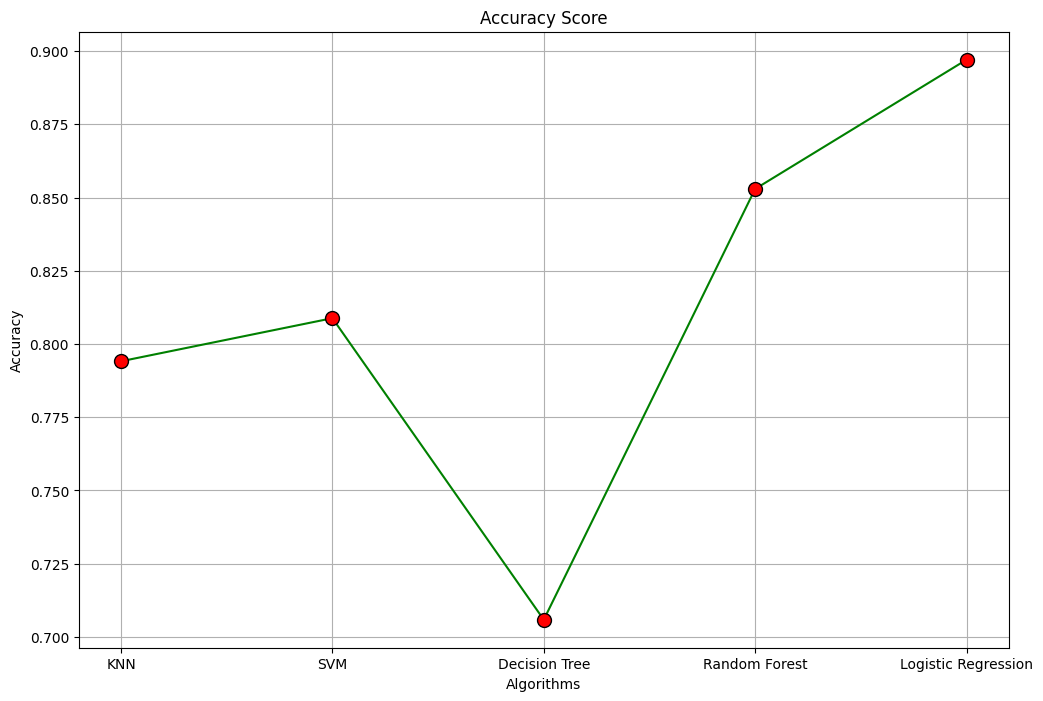

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot('Algorithm','Accuracy',data=accuracy_df,marker='o',color='green',ms = 10,mfc = 'r',mec = 'black')
plt.title("Accuracy Score")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.plot()
plt.grid()

# **Here, I choose  Logistic Regression for my prediction. because it gives  a higher accuracy score when compared with other algorithms.**

**Save the Logistic Regression Model**

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model6, '/content/drive/MyDrive/Colab Notebooks/Dataset/HeartPredLogModel.pkl')


['/content/drive/MyDrive/Colab Notebooks/Dataset/HeartPredLogModel.pkl']

In [ ]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0




---



# **User Input and Prediction**

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
age = int(input("Enter Age: "))
sex = int(input("Enter Sex (Male =1 /Female = 0): "))
chest_pain_type = int(input("Enter Chest Pain Type (1-4): "))
bp = int(input("Enter BP: "))
cholesterol = int(input("Enter Cholesterol: "))
fbs_over_120 = int(input("Enter FBS Over 120 (0 for No, 1 for Yes): "))
ekg_results = int(input("Enter EKG Results (0,1,2) : "))
max_hr = int(input("Enter Max HR: "))
exercise_angina = int(input("Enter Exercise Angina (0 for No, 1 for Yes): "))
st_depression = float(input("Enter ST Depression upto 10 : "))
slope_of_st = int(input("Enter Slope of ST (1,2,3) : "))
num_vessels_fluro = int(input("Enter Number of Vessels Fluro (0,1,2,3): "))
thallium = int(input("Enter Thallium: "))

In [ ]:
model_selection=model6.predict([[age, sex, chest_pain_type, bp,
                                cholesterol, fbs_over_120,ekg_results, max_hr, exercise_angina, st_depression,
                                 slope_of_st, num_vessels_fluro, thallium]])
model_selection

In [ ]:
if model_selection==1:
  print("Presence of Heart Disease")
else:
  print("Absence of Heart Disease")